# Simple Exponential Smoothing


## Intro


The idea of exponential smoothing originated in the 1950s and is basically a fancy way of stating that we will put more weight on recent observations. Older observations will receive less weight at an exponentially decaying rate. Hence, it is called exponential smoothing.

You can think of it as being half way between the naive forecast model, where we set the forecasts equal to the most recent observed value, and the average forecast model, where we set the forecast equal to the mean of all historical observations.

## What is Simple Exponential Smoothing?

This notebook will be regarding the most basic model in the exponential smoothing family, simple exponential smoothing. The reason this model is simple is because it doesn’t take into account trend or seasonality. 

In general, this simple model is best when your data doesn’t have any trend or seasonality. Alternatively, you can transform your data by carrying out differencing and the Box-Cox transform to make it stationary, hence removing its trend and seasonality. 

The general mathematical formula for (simple) exponential smoothing goes as follows:

$$
\hat{y}_{t+1} = \alpha y_t + \alpha (1 - \alpha) y_{t-1} + \alpha (1 - \alpha)^2 y_{t-2} + \cdots
$$

The α is the smoothing parameter which takes can take on values 0 ≤ α ≤ 1. The smoothing parameter is the main parameter we need to estimate when fitting this model. The parameter is often calculated by the method of least squares, which is fortunately done for us by most computing packages!

The higher the value of α, the more weight is put on recent observations and vice versa for lower values of α. If α=1, then we recover the naive forecast model where all forecasts are equal to the most recent observation.

We can simplify the above formula by expressing it in terms of the previous forecasts, ŷ_{t-1}:

$$
\hat{y}_{t+1} = \alpha y_t + (1 - \alpha) \hat{y}_{t-1}
$$

Like all time series, exponential smoothing methods are often broken into their components such as level, trend and seasonality. As simple exponential smoothing doesn’t take into account trend nor seasonality, it therefore only consists of the level component, l_t:

**Overall Equation:**  
$$
\hat{y}_{t+h} = l_t
$$  

**Level Equation:**  
$$
l_t = \alpha y_t + (1 - \alpha) l_{t-1}
$$

Where h is the future time step we are forecasting and we have made l_t = ŷ_{t+1} to explicitly state that this is the level component. This mathematical representation for simple exponential smoothing may seem useless as there is only one component, however it becomes really powerful when further components are added such as trend and seasonality.


## Implementing Exponential Smoothing in Python



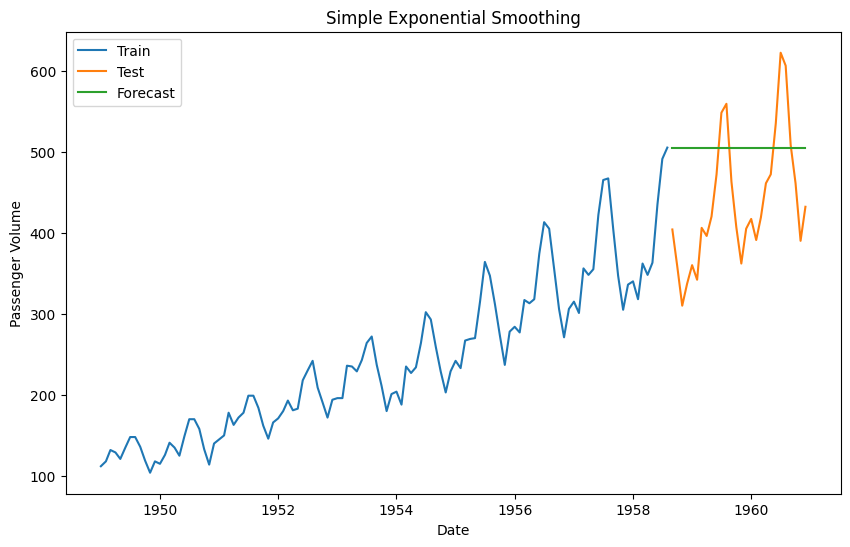

In [2]:
# Import packages
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt
import kagglehub

# Read in the data
path = kagglehub.dataset_download("ashfakyeafi/air-passenger-data-for-time-series-analysis")
data = pd.read_csv(path + "/AirPassengers.csv")
#data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])

# Split train and test
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]


def plot_func(forecast: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    #fig = go.Figure()
    #fig.add_trace(go.Scatter(x=train['Month'], y=train['#Passengers'], name='Train'))
    #fig.add_trace(go.Scatter(x=test['Month'], y=test['#Passengers'], name='Test'))
    #fig.add_trace(go.Scatter(x=test['Month'], y=forecast, name='Forecast'))
    #fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
    #                  width=650, title_x=0.5, height=400, xaxis_title='Date',
    #                  yaxis_title='Passenger Volume')
    
    #return fig.show()

    plt.figure(figsize=(10, 6))
    plt.plot(train['Month'], train['#Passengers'], label='Train')
    plt.plot(test['Month'], test['#Passengers'], label='Test')
    plt.plot(test['Month'], forecast, label='Forecast')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Passenger Volume')
    plt.legend()
    plt.show()


# Fit model and get forecasts
model = SimpleExpSmoothing(train['#Passengers']).fit(optimized=True)
forecasts = model.forecast(len(test))

# Plot the forecasts
plot_func(forecasts, 'Simple Exponential Smoothing')

The forecasts are obviosuly not great, but this is indeed the simplest exponential smoothing model. A key thing to note is that the forecasts are flat, which is obviously due to the model having no trend or seasonality component. 

In [2]:
model.summary()

Dep. Variable:,#Passengers,No. Observations:,116
Model:,SimpleExpSmoothing,SSE,83037.230
Optimized:,True,AIC,766.521
Trend:,None,BIC,772.028
Seasonal:,None,AICC,766.881
Seasonal Periods:,None,Date:,"Mon, 09 Oct 2023"
Box-Cox:,False,Time:,19:24:10
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,112.00000,l.0,True


The model found the optimal value of the smoothing parameter, α, (smoothing_level), to be 0.995. This is very high and indicates that the trend is quite volatile and changing frequently.